In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2704,spam,FreeMsg: Fancy a flirt? Reply DATE now & join ...,NaN,NaN,NaN
4286,ham,I wud never mind if u dont miss me or if u don...,NaN,NaN,NaN
3660,ham,Well then you have a great weekend!,NaN,NaN,NaN
1310,ham,"I.ll always be there, even if its just in spir...",NaN,NaN,NaN
3705,ham,Reading gud habit.. Nan bari hudgi yorge patai...,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

## Data cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [10]:
df.sample(5)

,v1,v2
4953,ham,U coming back 4 dinner rite? Dad ask me so i r...
4117,ham,Watch lor. I saw a few swatch one i thk quite ...
3721,ham,I'm in a movie... Collect car oredi...
3402,ham,Good night my dear.. Sleepwell&amp;Take care
574,ham,Nope i waiting in sch 4 daddy...


In [11]:
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace = True)

In [12]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [16]:
df.head()  # Encoding the output columns

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
# Checking the duplicate values
df.duplicated().sum()

403

In [20]:
# Removing the duplicate values
df = df.drop_duplicates(keep = 'first')

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(5169, 2)

## EDA

In [24]:
df['target'].value_counts()    # 0 : ham and 1 : spam

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x217aa498310>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

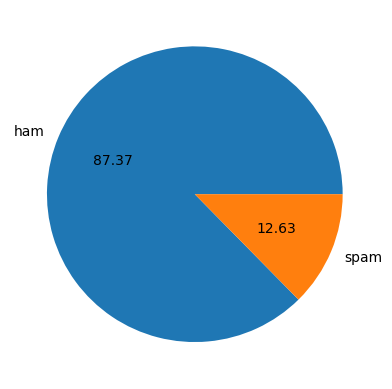

In [25]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'], autopct = "%0.2f")

In [27]:
# Data is Imbalanced : ratio of spam and ham is very high

In [28]:
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VAIBHAV\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [30]:
# We are creating 3 new columns : number of words, number of character and number of sentences in the input

In [32]:
df['num_characters'] = df['text'].apply(len)   # Number of characters in every mail

In [33]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
df['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [35]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [36]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [37]:
df['text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [38]:
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [39]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [41]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [42]:
df[df['target'] == 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [43]:
df[df['target'] == 1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [44]:
import seaborn as sns

C:\Users\VAIBHAV\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VAIBHAV\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

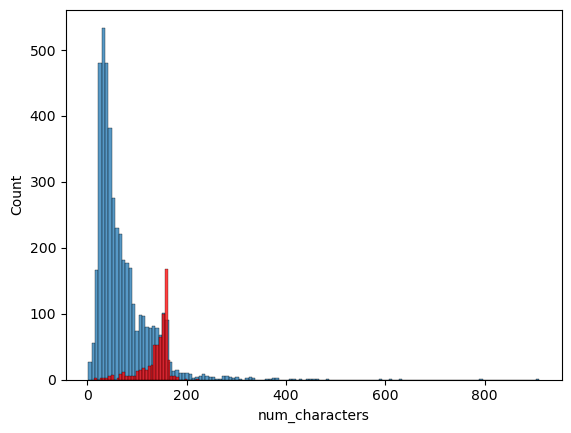

In [47]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')

C:\Users\VAIBHAV\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VAIBHAV\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

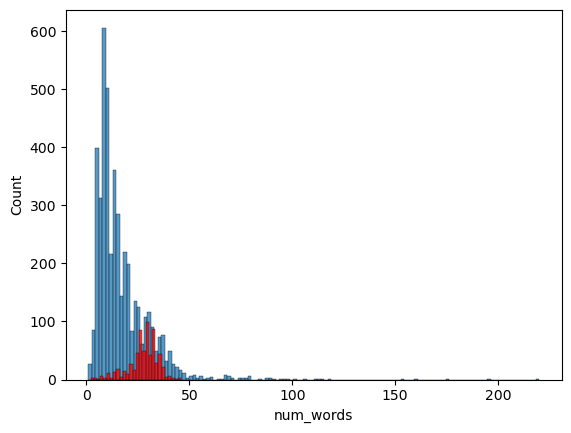

In [48]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color = 'red')

C:\Users\VAIBHAV\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VAIBHAV\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\VAIBHAV\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VAIBHAV\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass 

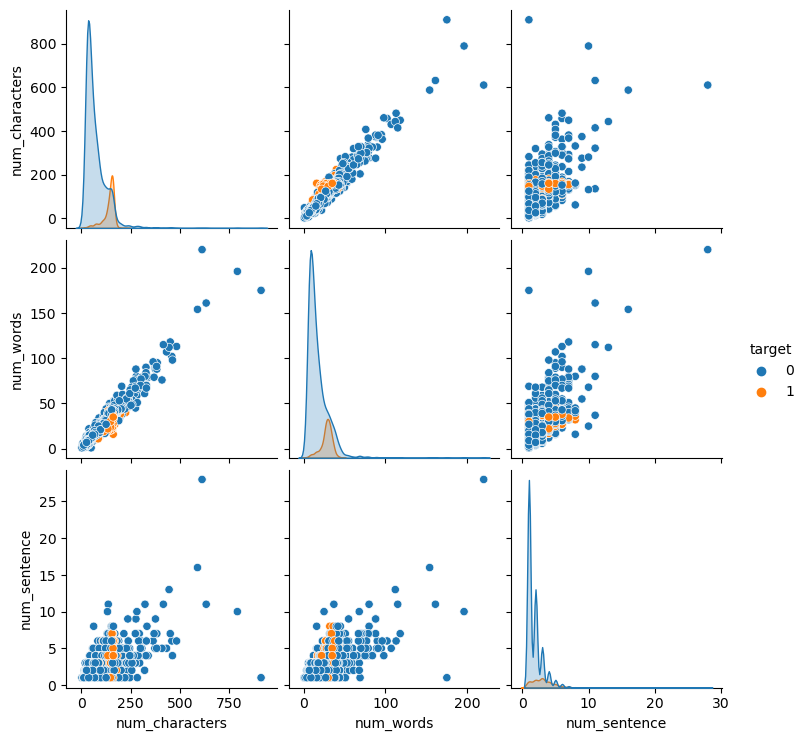

In [49]:
sns.pairplot(df,hue = 'target')

## Data preprocessing:
1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuations
5. Stemming

In [69]:
import string
from nltk.stem.porter import PorterStemmer
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = list()
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i);
    text = y[:]
    y.clear()
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y);

In [71]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [72]:
# Checking which words are more often used in both spam and ham

In [74]:
df['transformed_text'] = df['text'].apply(transform_text)

In [75]:
from wordcloud import WordCloud

In [85]:
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white')

In [86]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

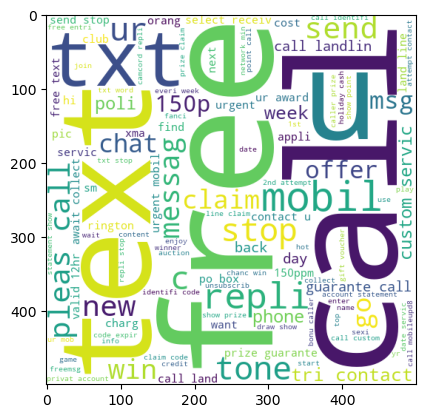

In [89]:
plt.imshow(spam_wc)

In [90]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

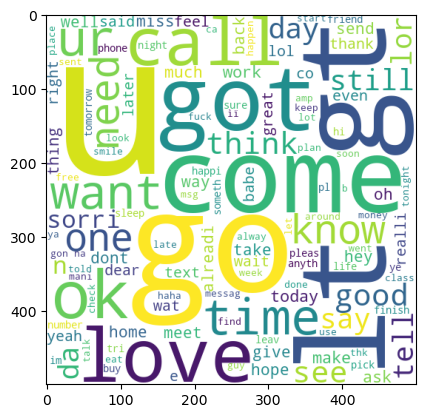

In [91]:
plt.imshow(ham_wc)

In [92]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [97]:
spam_corpus = list()
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [99]:
len(spam_corpus)

9939

In [100]:
from collections import Counter

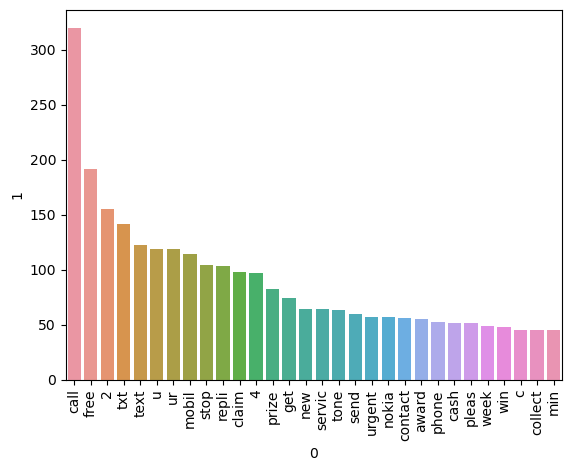

In [108]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [105]:
ham_corpus = list()
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [106]:
len(ham_corpus)

35394

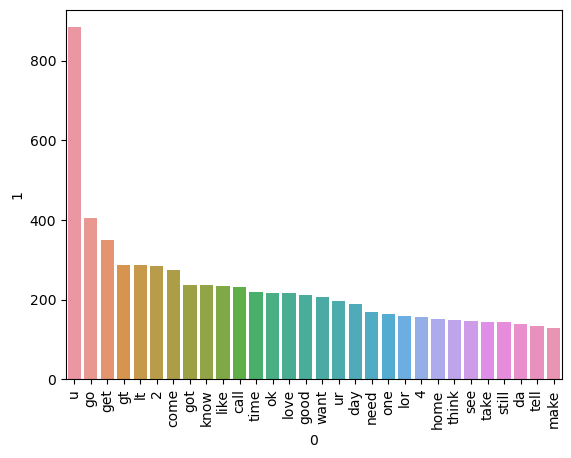

In [109]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

## MODEL BUILDING : BASED ON NAIVE BAYES

In [187]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [188]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [189]:
x.shape

(5169, 6708)

In [190]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [191]:
y = df['target'].values

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [193]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [194]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [195]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

In [196]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [197]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [198]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

In [199]:
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [200]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [201]:
## Taking precision score as a important factor,we are going with multinomial Naive Bayes
## tfidf -> mnb

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [203]:
svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [204]:
clfs = {
    'SVC' : svc,
#     'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [205]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [206]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [207]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.9661508704061895
Precision -  0.9256198347107438


In [208]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [209]:
performance_df

,Algorithm,Accuracy,Precision
1,NB,0.970986,1.000000
4,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
7,ETC,0.974855,0.974576
3,LR,0.958414,0.970297
5,AdaBoost,0.960348,0.929204
9,xgb,0.966151,0.925620
8,GBDT,0.947776,0.920000
6,BgC,0.957447,0.867188
2,DT,0.927466,0.811881


In [210]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [211]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.970986
1,RF,Accuracy,0.974855
2,SVC,Accuracy,0.975822
3,ETC,Accuracy,0.974855
4,LR,Accuracy,0.958414
5,AdaBoost,Accuracy,0.960348
6,xgb,Accuracy,0.966151
7,GBDT,Accuracy,0.947776
8,BgC,Accuracy,0.957447
9,DT,Accuracy,0.927466


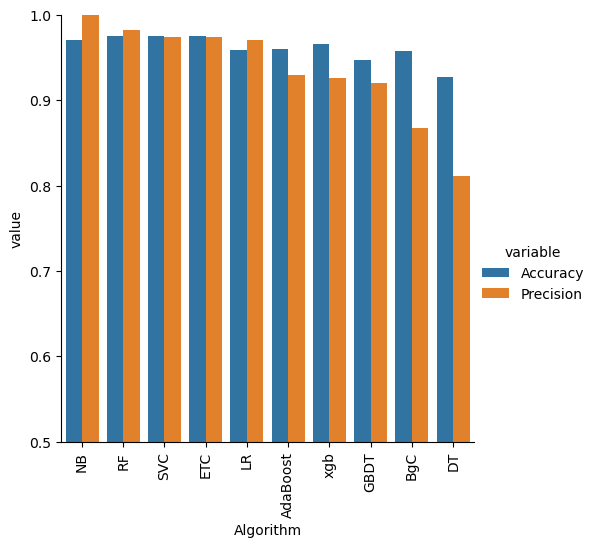

In [212]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [213]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [214]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [215]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [216]:
new_df = performance_df.merge( temp_df,on='Algorithm')

In [217]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [218]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [221]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
1,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
2,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
3,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
4,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
5,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
6,xgb,0.966151,0.925620,0.966151,0.925620,0.966151,0.925620,0.966151,0.925620
7,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000
8,BgC,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188
9,DT,0.927466,0.811881,0.927466,0.811881,0.927466,0.811881,0.927466,0.811881


In [223]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [224]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [225]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [226]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [227]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [228]:
from sklearn.ensemble import StackingClassifier

In [229]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [232]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [230]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.9253731343283582


In [233]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))